<a href="https://colab.research.google.com/github/abdulmoizlakhani/gen_ai_and_ds_pgd/blob/main/Assignment_01/Assignment_01_PGD_AI_DS_GEN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
path = '/content/Churn_Modelling.csv' # Data file path

In [125]:
data = pd.read_csv(path)

In [70]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
data.shape

(10000, 14)

In [72]:
# We have 10,000 rows and 14 columns

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [74]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [75]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [76]:
# We have no missing values.

In [77]:
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [78]:
(data[data['Exited'] == 1].shape[0] / data.shape[0]) * 100

20.369999999999997

In [79]:
# So, around 20% of the data is showing churn

In [80]:
churn = data['Exited'].value_counts().reset_index()

In [81]:
churn.head()

,Exited,count
0,0,7963
1,1,2037


<Axes: xlabel='Exited', ylabel='count'>

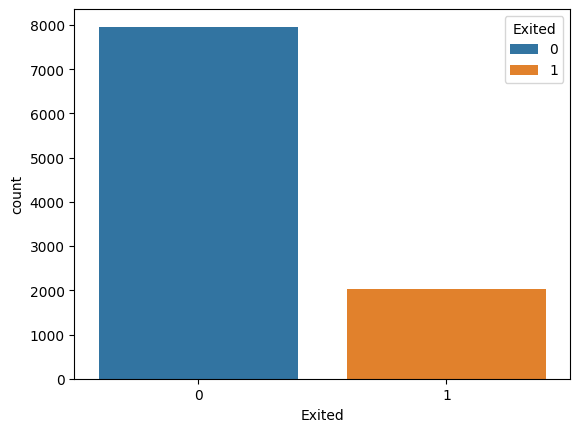

In [82]:
sns.barplot(x = churn['Exited'], y = churn['count'], hue = churn['Exited'])

In [83]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Tenure', ylabel='Density'>

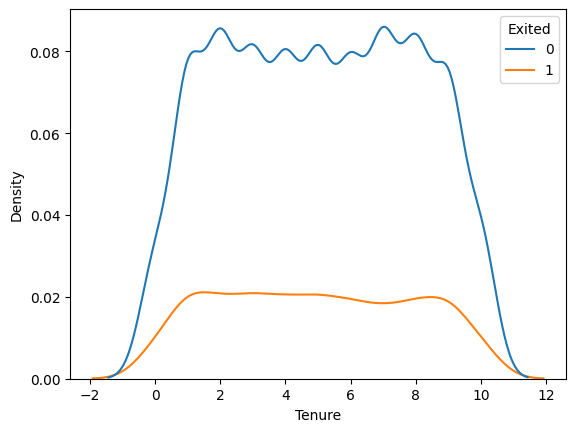

In [84]:
sns.kdeplot(x = data['Tenure'], hue = data['Exited'])

In [85]:
# Observations:
# 1. Lesser tenure, high chances to churn.
# 2. To reduce customer churn, business should work on customer retainshion strategies.

In [86]:
churning = data[data['Exited'] == 1]

In [87]:
churning.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1


In [88]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [89]:
def calculate_ratios(ax):
  l = len(ax.patches)
  cnt = 0
  without_churn = []
  with_churn = []

  for p in ax.patches:
    if cnt < 1/2:
      without_churn.append(p.get_height())
    else:
      with_churn.append(p.get_height())
    cnt += 1

  print("without_churn: ", without_churn)
  print("with_churn: ", with_churn)

  ratio = []

  for i in range(len(without_churn)):
    ratio.append(with_churn[i] / without_churn[i])

  print("ratio: ", ratio)

([0, 1, 2], [Text(0, 0, 'France'), Text(1, 0, 'Spain'), Text(2, 0, 'Germany')])

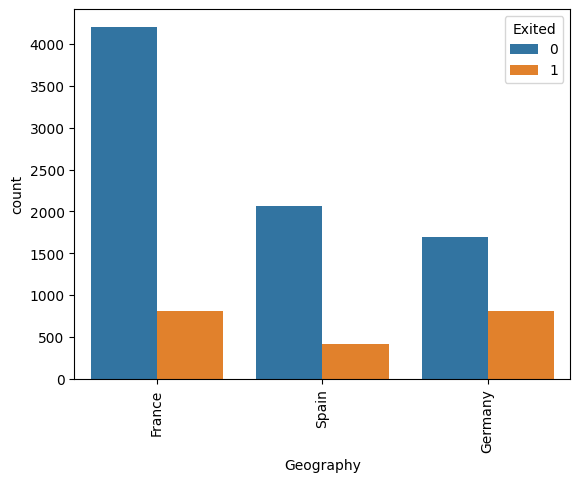

In [90]:
ax = sns.countplot(x = data['Geography'], hue = data['Exited'])
plt.xticks(rotation = 90)

In [91]:
calculate_ratios(ax)

without_churn:  [4204.0]
with_churn:  [2064.0, 1695.0, 810.0, 413.0, 814.0, 0, 0]
ratio:  [0.49096098953377737]


In [92]:
# Observations:
# Germany has the maximum churn ratio.

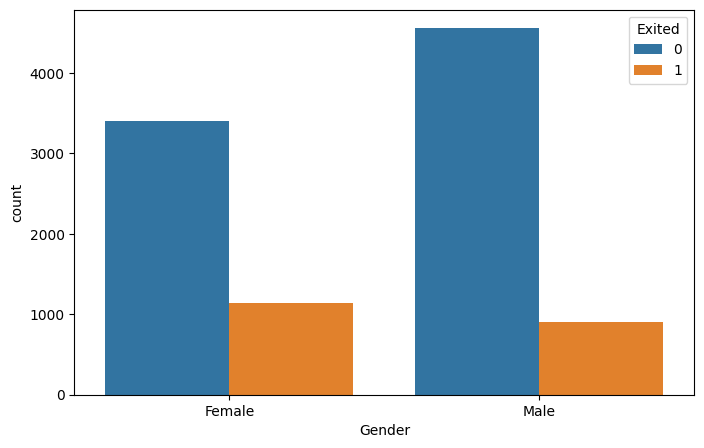

In [93]:
plt.figure(figsize = (8, 5))
g = sns.countplot(x = data['Gender'], hue = data['Exited'])

In [94]:
calculate_ratios(g)

without_churn:  [3404.0]
with_churn:  [4559.0, 1139.0, 898.0, 0, 0]
ratio:  [1.3393066980023502]


In [95]:
(churning[churning['Gender'] == 'Female'].shape[0] / data[data['Gender'] == 'Female'].shape[0]) * 100

25.071538630860662

In [96]:
# Observations:
# On an average almost 25% female customers churn.

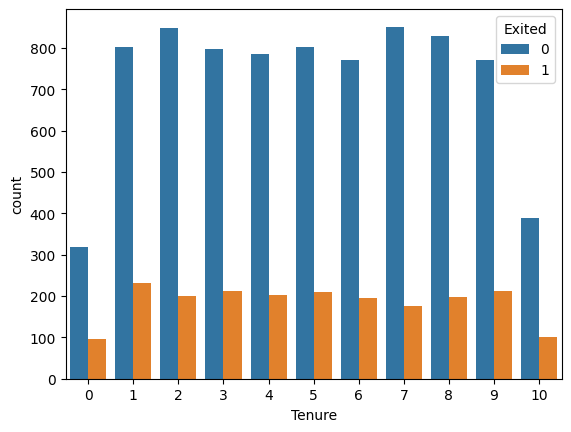

In [97]:
dev = sns.countplot(x = data['Tenure'], hue = data['Exited'])

In [98]:
calculate_ratios(dev)

without_churn:  [318.0]
with_churn:  [803.0, 847.0, 796.0, 786.0, 803.0, 771.0, 851.0, 828.0, 771.0, 389.0, 95.0, 232.0, 201.0, 213.0, 203.0, 209.0, 196.0, 177.0, 197.0, 213.0, 101.0, 0, 0]
ratio:  [2.5251572327044025]


In [99]:
# Observations:
# Customers with 1 year tenure are more likely to churn.

In [100]:
status = churning['HasCrCard'].value_counts().reset_index()

In [101]:
status.head()

,HasCrCard,count
0,1,1424
1,0,613


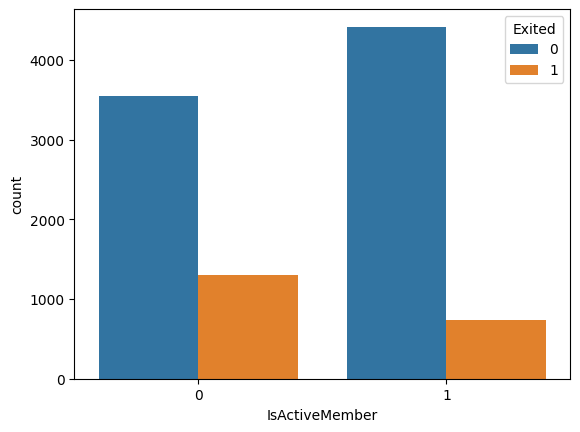

In [102]:
status = sns.countplot(x = data['IsActiveMember'], hue = data['Exited'])

In [103]:
calculate_ratios(status)

without_churn:  [3547.0]
with_churn:  [4416.0, 1302.0, 735.0, 0, 0]
ratio:  [1.2449957710741473]


In [104]:
# Observations:
# Non-active customers are more likely to churn.

In [105]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4])

([0, 1, 2, 3],
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

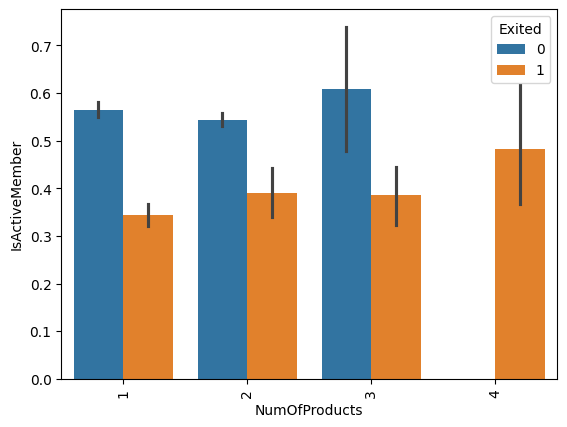

In [106]:
productpref = sns.barplot(x = data['NumOfProducts'], y = data['IsActiveMember'], hue = data['Exited'])
plt.xticks(rotation = 90)

In [107]:
calculate_ratios(productpref)

without_churn:  [0.5654421768707483]
with_churn:  [0.5445544554455446, 0.6086956521739131, 0.34421575585521647, 0.39080459770114945, 0.38636363636363635, 0.48333333333333334, 0, 0]
ratio:  [0.9630594917047047]


<Axes: xlabel='NumOfProducts', ylabel='IsActiveMember'>

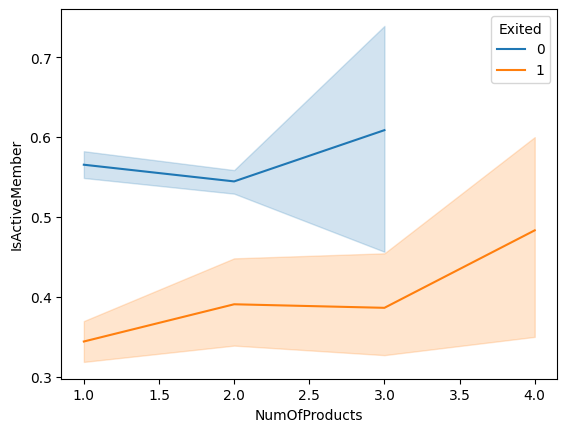

In [108]:
sns.lineplot(x = data['NumOfProducts'], y = data['IsActiveMember'], hue = data['Exited'])

In [109]:
# Observations:
# 1. Most of the customers that churn are having more products.
# 2. Organisation / Company should focus on long term relation with the customer.
# 3. It should also focus on providing consistent quality products.

<Axes: xlabel='CreditScore', ylabel='Count'>

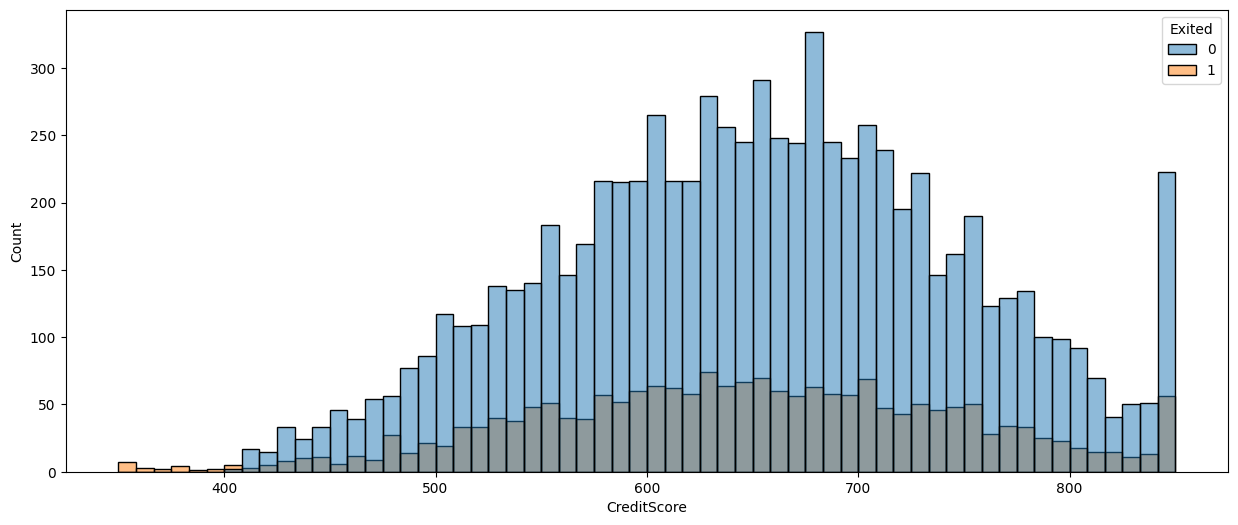

In [110]:
plt.figure(figsize = (15, 6))
sns.histplot(x = data['CreditScore'], hue = data['Exited'], bins = 60)

In [111]:
country = data['Geography'].value_counts().reset_index()

In [112]:
country

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


<Axes: xlabel='Geography', ylabel='count'>

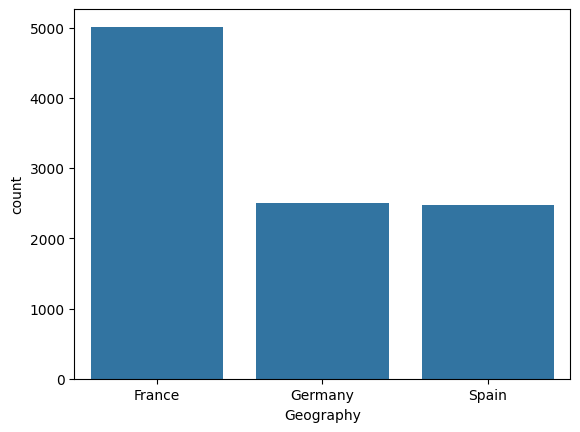

In [113]:
sns.barplot(x = country['Geography'], y = country['count'])

In [114]:
# Observations:
# Most regular customers are from France that are least likely to churn.

<Axes: xlabel='Gender', ylabel='IsActiveMember'>

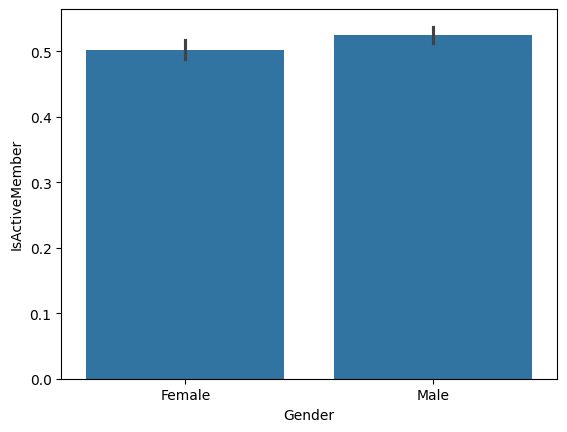

In [115]:
sns.barplot(x = data['Gender'], y = data['IsActiveMember'])

In [116]:
# Observations:
# No much gender bias, both male and female are active members.

In [117]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [129]:
data.drop(columns=['CustomerId'], inplace=True)

In [119]:
# Dropped 'Customer ID' as it is no impact on churn.

In [120]:
data.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [131]:
data1 = pd.get_dummies(data, columns=['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'], dtype=int)
data1.head()

,RowNumber,Exited,Surname_Abazu,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,...,EstimatedSalary_199805.63,EstimatedSalary_199808.1,EstimatedSalary_199841.32,EstimatedSalary_199857.47,EstimatedSalary_199862.75,EstimatedSalary_199909.32,EstimatedSalary_199929.17,EstimatedSalary_199953.33,EstimatedSalary_199970.74,EstimatedSalary_199992.48
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
X = data1.loc[:, data1.columns != 'Exited']

In [135]:
Y = data1['Exited']

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=10)

In [138]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [139]:
# Impementing Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_predict) * 100)
print('Confusion Matrix: ', confusion_matrix(y_test, y_predict))
print('Classification Report: ', classification_report(y_test, y_predict))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  84.13333333333334
Confusion Matrix:  [[2284   96]
 [ 380  240]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.96      0.91      2380
           1       0.71      0.39      0.50       620

    accuracy                           0.84      3000
   macro avg       0.79      0.67      0.70      3000
weighted avg       0.83      0.84      0.82      3000

